<a href="https://colab.research.google.com/github/KKawaguchi1219/Optimizer-demo/blob/main/optimizer_gif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

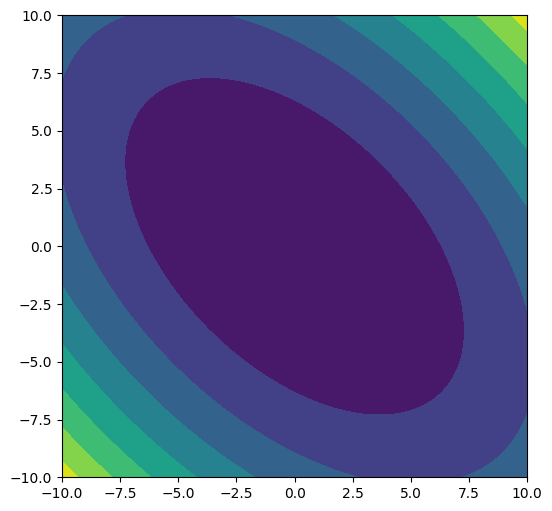

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, y):
  return x**2 + y**2+ x*y

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

x, y = np.meshgrid(x, y)
z = func(x, y)

plt.figure(figsize=(6,6))
plt.contourf(x, y, z)
plt.show()

In [2]:
import torch

# func : x**2 + y**2+ x*y
def f1(x):
  return x[0]**2 + x[1]**2 + x[0]*x[1]

def f2(x):
    return x[0] ** 3 + x[1] ** 3 + 3 * x[0] ** 2 - 3 * x[1] ** 2 - 8

def sgd_optimize(f, init, Ir, max_iter=100, **params):
  x = torch.tensor(init, dtype=torch.float32, requires_grad=True)
  optimizer = torch.optim.SGD([x], Ir, **params)

  xs = [x.clone()]
  x_old = x.clone()

  for i in range(max_iter):
    # calculate in function
    y = f(x)
    # calculate gradient
    optimizer.zero_grad()
    y.backward()
    # update gradient
    optimizer.step()

    if (x - x_old).norm() < 0.01:
      break
    x_old = x.clone()

    xs.append(x.clone())

  xs = torch.stack(xs).detach().numpy()

  return xs

xs = sgd_optimize(f1, init=[0, 10], Ir=0.05)

In [3]:
def Adam_optimize(f, init, Ir, max_iter=100, **params):
  x = torch.tensor(init, dtype=torch.float32, requires_grad=True)
  optimizer = torch.optim.Adam([x], Ir, **params)

  xs_adam = [x.clone()]
  x_old = x.clone()

  for i in range(max_iter):
    # calculate in function
    y = f(x)
    # calculate gradient
    optimizer.zero_grad()
    y.backward()
    # update gradient
    optimizer.step()

    if (x - x_old).norm() < 0.01:
      break
    x_old = x.clone()

    xs_adam.append(x.clone())

  xs_adam = torch.stack(xs_adam).detach().numpy()

  return xs_adam

xs_adam = Adam_optimize(f1, init=[0, 10], Ir=1, betas=(0.7, 0.999))

**SGD**

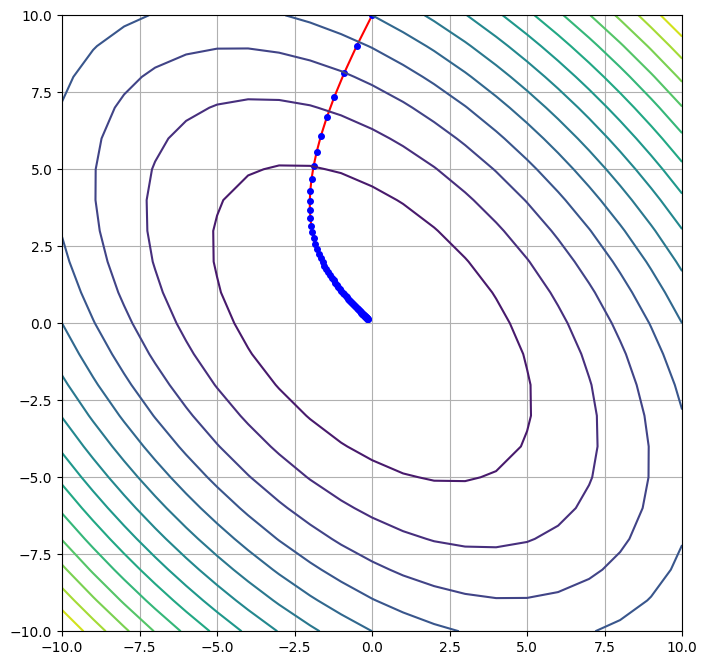

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
X1, X2 = np.mgrid[-10:11, -10:11]
y = f1((X1, X2))

ax = fig.add_subplot(111)
ax.grid()
ax.plot(xs[:,0], xs[:,1], "ro-", mec="b", mfc="b", ms=4)
ax.contour(X1, X2, y, levels=15)

plt.show()

**Adam?**

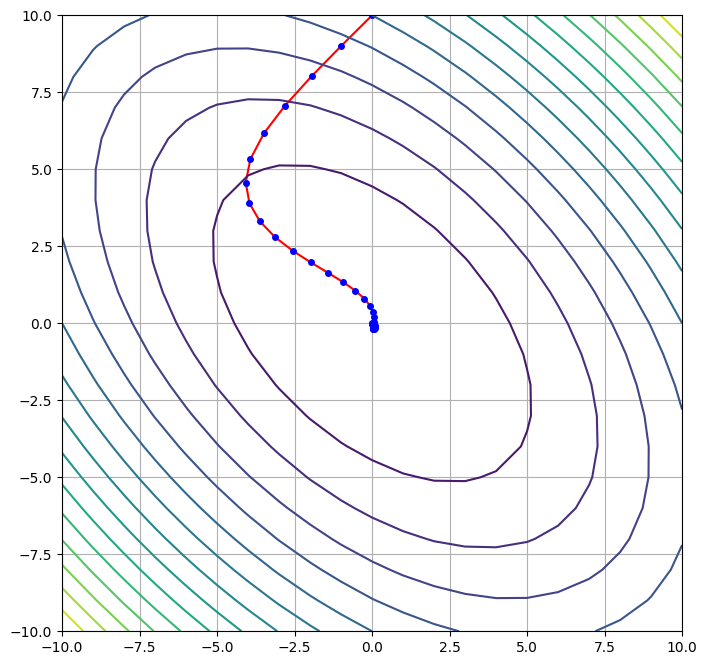

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
X1, X2 = np.mgrid[-10:11, -10:11]
y = f1((X1, X2))

ax = fig.add_subplot(111)
ax.grid()
ax.plot(xs_adam[:,0], xs_adam[:,1], "ro-", mec="b", mfc="b", ms=4)
ax.contour(X1, X2, y, levels=15)

plt.show()

In [6]:
xs[:,0][:2]

array([ 0. , -0.5], dtype=float32)

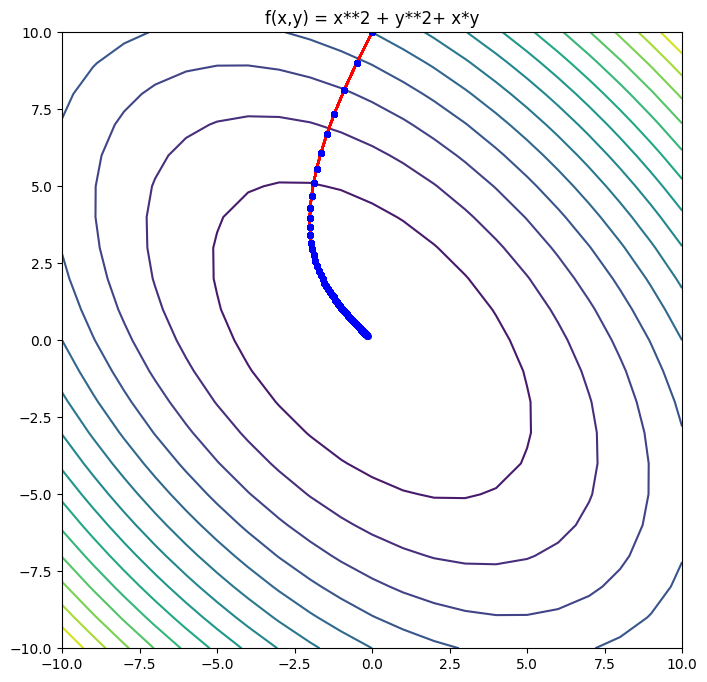

In [7]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(8,8))
ims = []
X1, X2 = np.mgrid[-10:11, -10:11]
y = f1((X1, X2))
ax = fig.add_subplot(111)
ax.set_title("f(x,y) = x**2 + y**2+ x*y")
ax.contour(X1, X2, y, levels=15)
for i in range(1, len(xs)):
  im = ax.plot(xs[:,0][:i], xs[:,1][:i], "ro-", mec="b", mfc="b", ms=4, label="SGD")
  ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=150)
plt.show()
ani.save("test_sgd.gif", writer="pillow")

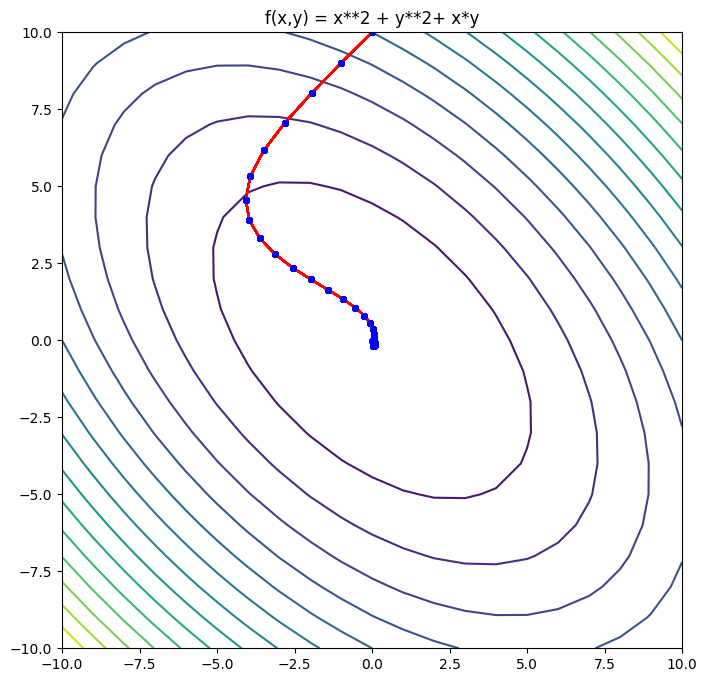

In [8]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(8,8))
ims = []
X1, X2 = np.mgrid[-10:11, -10:11]
y = f1((X1, X2))
ax = fig.add_subplot(111)
ax.set_title("f(x,y) = x**2 + y**2+ x*y")
ax.contour(X1, X2, y, levels=15)
for i in range(1, len(xs_adam)):
  im = ax.plot(xs_adam[:,0][:i], xs_adam[:,1][:i], "ro-", mec="b", mfc="b", ms=4, label="Adam")
  ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=150)
plt.show()
ani.save("test_adam.gif", writer="pillow")